# 1st lab: https://github.com/itmo-ml-lab-ML-course/parser-DKurepin

In [572]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

df = pd.read_csv('preprocessed_dubicars.csv')
df

,price_bins,model_year,cylinders,wheels_size,time_owned,per_year_cost,per_kkm_cost,car_type_suv,car_interior_rare,fuel_type_id,mileage_distribution_id,premium_manufacturers,car_location_Dubai
0,8,2022,6,20,1,398000,398000,1,1,1,1,0,1.0
1,9,2020,8,22,0,203333,12788,1,0,1,1,1,1.0
2,6,2022,6,18,1,199000,19702,0,0,1,1,1,1.0
3,5,2022,4,17,1,119000,4288,1,1,1,1,0,1.0
4,2,2017,4,18,0,7166,255,0,1,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,4,2018,8,20,0,17600,813,0,0,1,0,0,1.0
4341,7,2023,6,17,1,210000,210000,1,1,1,1,0,1.0
4342,7,2023,4,19,1,244000,244000,0,1,1,1,1,1.0
4343,7,2023,6,17,1,210000,210000,1,1,1,1,0,1.0


In [573]:
import seaborn as sns

def heatmap(data: pd.DataFrame):
    plt.figure(figsize=(20, 20))
    sns.heatmap(data.corr(method='kendall'), square=True, linecolor='white', annot=True)
    plt.xticks(rotation=45)
    plt.show()

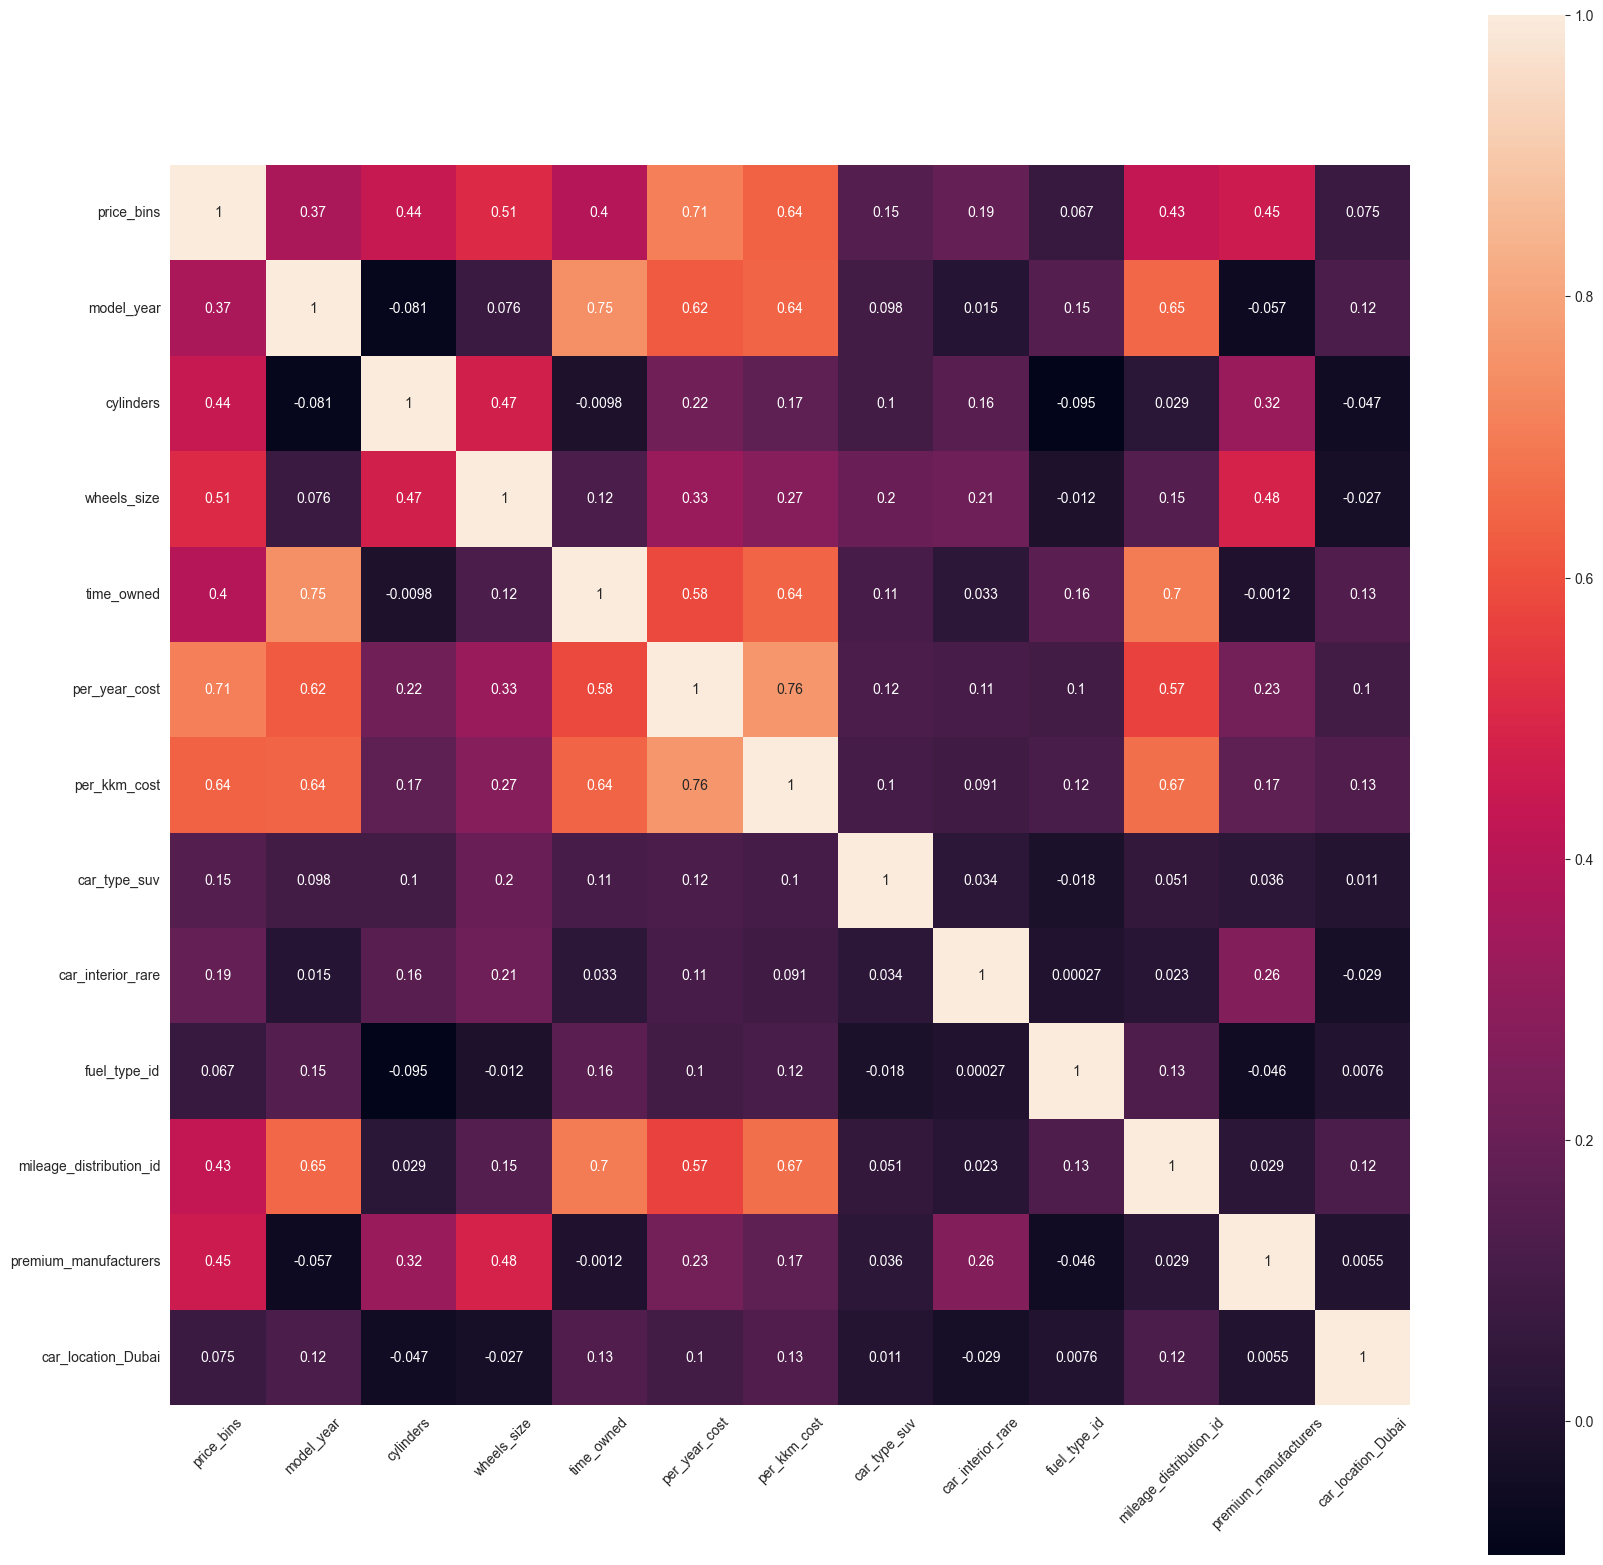

In [574]:
heatmap(df)

In [575]:
def get_all_combs(data: pd.DataFrame):
    import itertools
    param_combs = []
    for i in range(1, len(data.columns)):
        param_combs += list(itertools.combinations(data.columns[1:], i))
    return param_combs

Using cross validation and different combinations of parameters (variables in our dataset) to find the best model

In [576]:
def choose_best_model(data: pd.DataFrame, target: str):
    from sklearn.model_selection import train_test_split, cross_val_score, KFold
    from sklearn.linear_model import LinearRegression
    from tqdm.notebook import tqdm

    param_combs = get_all_combs(data)
    y = data[target]
    best_params = []
    best_score = 100000

    for params in tqdm(param_combs):
        x_train, x_test, y_train, y_test = train_test_split(data[list(params)], y, test_size=0.2, shuffle=True)
        lin_reg = LinearRegression()
        score = cross_val_score(lin_reg, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
        score = np.sqrt(-score)
        middle = score.mean()
        if middle < best_score:
            best_score = middle
            best_params = params

    print(f'Best score: {best_score:.2f}')
    print(f'Best params: {best_params}')
    return best_params, best_score

In [577]:
best_params, best_score = choose_best_model(df, 'price_bins')

  0%|          | 0/4095 [00:00<?, ?it/s]

Best score: 1.09
Best params: ('model_year', 'cylinders', 'wheels_size', 'time_owned', 'per_year_cost', 'per_kkm_cost', 'car_type_suv', 'car_interior_rare', 'fuel_type_id', 'mileage_distribution_id', 'premium_manufacturers', 'car_location_Dubai')


Fitting the model with best parameters

In [578]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression

y = df['price_bins']
X = df[list(best_params)]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred_sklearn = lin_reg.predict(x_test).astype(int)
print(f'Predicted values: {y_pred_sklearn}')

Predicted values: [ 8  6  3  5  2  4  2  5  3  5  5  8  5  6  5  5  5  5  5  6  6  6  9  4
  6  3  8  5  3  3  5  9  8  4  6  4  4  3  4  8  3  6  6  4  9  5  5  8
  4  5  4  5  7  4  6  5  3  4  6  3  7  4  6  7  6  3  3  9  9  3  4  9
  3  4  2  2  4  3  3  4  6  6  5 10  5  9  3  3  5  7 11  6  6  5  4  2
  2  6  2  6  5  3  5  6  8  5  7  2  5  2  5  9  7  5  6  6  9  2  7  4
  5  7  3  5  5  4  9  4  4  8  5  7  4  6  2  5  4  2 13 13  3  4  6  7
  3  5  3  5  8  5  3  4  4  6  4  6  9  2  5  2  5  7  3  6  2  4  6  8
  2  6  7  7  2  5  4  3  4  4  3  4  6  4  8 11  6  7  8  5  8  5  7  5
  6  6  6  5  4  7  4  5  4  4  9 10  2  6  4  6  5  6  9  4  4  3 11  4
  6  5  3  4  5  5  2  4  4  8  6  6  8  9  5  3  2  6  4  7  4  4  5  2
  2  2  7  4  4  4  6  2  5  6  9  4  5  3  5 10  5  4  6  9  4  6  7  6
  5  2  7  3  4  5  3  8  5  4  3  6  9  6  4  9  5  8  9  3  3  4  6  3
  3  6  7  5  9  4  4  6  3  6  2  2  4  5  6  3  6 11  1  8  2  4  6  9
  9  9  5  4  9  5  3  5  8  2  5

In [579]:
coef = lin_reg.coef_
intercept = lin_reg.intercept_
print("Coefficients: {}".format(coef))
print("Intercept: {}".format(intercept))

Coefficients: [1.54453250e-01 3.75449687e-01 1.86602132e-01 1.99497236e-01
 7.90670700e-07 5.45134381e-07 1.83454746e-01 9.80412240e-02
 6.40478876e-01 8.01965912e-01 1.26054933e+00 2.53655471e-01]
Intercept: -314.57216903233615


Metrics of sklearn model

In [580]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred_sklearn)
mse = metrics.mean_squared_error(y_test, y_pred_sklearn)
root_mean_sq_err_sklearn = np.sqrt(metrics.mean_squared_error(y_test, y_pred_sklearn))
print(f'R squared: {lin_reg.score(X,y)*100.0:.2f} %')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print('Root Mean Square Error:', root_mean_sq_err_sklearn)

R squared: 76.95 %
Mean Absolute Error: 0.96
Mean Squared Error: 1.63
Root Mean Square Error: 1.276502702091339


In [581]:
result_df = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_sklearn})
result_df

,Actual value,Predicted value
1777,8,8
1320,8,6
1954,4,3
810,4,5
3957,2,2
...,...,...
14,4,5
2690,5,5
3194,9,8
752,10,11


In [582]:
def plot_predicted_vs_actual(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual value')
    plt.ylabel('Predicted value')
    plt.title('Actual vs Predicted value')
    plt.show()

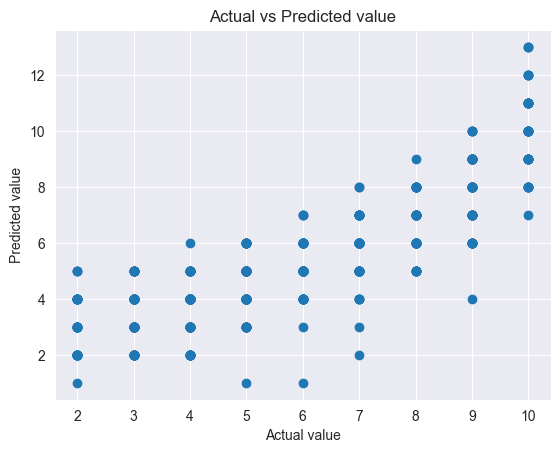

In [583]:
plot_predicted_vs_actual(y_test, y_pred_sklearn)

## My Linear Regression model ##

In [584]:
df_mlr = pd.read_csv('preprocessed_dubicars.csv')
df_mlr

,price_bins,model_year,cylinders,wheels_size,time_owned,per_year_cost,per_kkm_cost,car_type_suv,car_interior_rare,fuel_type_id,mileage_distribution_id,premium_manufacturers,car_location_Dubai
0,8,2022,6,20,1,398000,398000,1,1,1,1,0,1.0
1,9,2020,8,22,0,203333,12788,1,0,1,1,1,1.0
2,6,2022,6,18,1,199000,19702,0,0,1,1,1,1.0
3,5,2022,4,17,1,119000,4288,1,1,1,1,0,1.0
4,2,2017,4,18,0,7166,255,0,1,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,4,2018,8,20,0,17600,813,0,0,1,0,0,1.0
4341,7,2023,6,17,1,210000,210000,1,1,1,1,0,1.0
4342,7,2023,4,19,1,244000,244000,0,1,1,1,1,1.0
4343,7,2023,6,17,1,210000,210000,1,1,1,1,0,1.0


Realisation of linear regression, fitting the model and predicting the values, cross validation and choosing the best model

In [585]:
def linear_regression(X, y):
    X = np.array(X)
    y = np.array(y)
    n = X.shape[0]
    X = np.c_[np.ones(n), X]
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    intercept = theta[0]
    theta = theta[1:]
    return theta, intercept

In [586]:
def predict(X, theta, intercept):
    X = np.array(X)
    y_pred = X.dot(theta) + intercept
    return y_pred

In [587]:
def fit_model(X, y):
    theta, intercept = linear_regression(X, y)
    return theta, intercept

In [588]:
from sklearn.model_selection import train_test_split, KFold


def cross_validation(X, y, k=10):
    kf = KFold(n_splits=k)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = np.array(X)[train_index], np.array(X)[test_index]
        y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
        theta, intercept = linear_regression(X_train, y_train)
        y_pred = predict(X_test, theta, intercept)
        scores.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    return np.array(scores).mean()


In [589]:
def choose_best_model_mlr(data: pd.DataFrame, target: str):
    from sklearn.model_selection import train_test_split
    from tqdm.notebook import tqdm
    param_combs = get_all_combs(data)
    y = data[target]
    best_params = []
    best_score = 100000

    for params in tqdm(param_combs):
        x_train, x_test, y_train, y_test = train_test_split(data[list(params)], y, test_size=0.2, shuffle=True)
        score = cross_validation(x_train, y_train)
        if score < best_score:
            best_score = score
            best_params = params
    print('Best score: {:.2f}'.format(best_score))
    print('Best params: {}'.format(best_params))
    return best_params, best_score

Choosing the best model for my supervised learning model


In [590]:
best_params_mlr, best_score_mlr = choose_best_model_mlr(df_mlr, 'price_bins')

  0%|          | 0/4095 [00:00<?, ?it/s]

Best score: 1.09
Best params: ('model_year', 'cylinders', 'wheels_size', 'time_owned', 'per_year_cost', 'car_type_suv', 'fuel_type_id', 'mileage_distribution_id', 'premium_manufacturers')


Fitting the model with the best parameters and predicting the values

In [591]:
final_df = df_mlr[list(best_params_mlr)]
x_train_mlr, x_test_mlr, y_train_mlr, y_test_mlr = train_test_split(final_df, y, test_size=0.2)
theta, intercept = fit_model(x_train_mlr, y_train_mlr)
y_pred_mlr = predict(x_test_mlr, theta, intercept)
y_pred_mlr = y_pred_mlr.astype(int)
print(f'Predicted values: {y_pred_mlr}')

Predicted values: [ 9  7  9  9  6  3  4  4  9  5  3  5  3  2  4  3  5  6  6  5  3  3  6  6
  4  3  7  3  2  5  2  3  4  5  4  4  5  6  2  4  5  4  4  3 11  4  4  5
  4  4  6  8  3  9  4  6  4  9 12  6  6  3  1  5  6  2  4 10  6  4  4  1
  6  4  9  4  4  4  9  4  5  6  4  9  6  5  4  7  5  5  9  3  3  3  4  2
  5  5  4  4  3  2  3  6  5  4  3  5  8  3  8  8  2  8  7  2  6  3  3  2
  6  4  6  6  5 10  4  4  2  3  6  4  3  4  5  9  6  5  5  7  6  5  3  6
  3  6  6  4  7  5  6  4  5  2  3  5  7  5  5  5  5  8  5  4  7  6  5  9
  5  6  3  3  8  9  2  6  6  4  5  3  4  3  5  7  4  3  7  8  5  4  7  6
  3  7  4  7  6  4  4  5  8  5  5  6  6  3  5  4  4  4  9  4  4  3  3  3
  3  3  4  6  3  5  9  8  3  3  4  6  4  4  7  5  4  5  4  9  5 10  2  4
  5  5  4  7  3  5  6  4  8  2  6  2  4  8  4  4  3  3  6  9  4  3  6  9
  5  5  5  4  9  5  7  3  4  6  7  9  2  3  5  4  7  5  4  6  3  6  5  5
  5  9  3  4  5  6  4  4  5  6  5  6  6  2  3  5  3  4  5  5  3  3  6  9
  2  5  5  2  4  4  5  7  5  4  4

In [592]:
root_mean_sq_err_mlr = np.sqrt(metrics.mean_squared_error(y_test_mlr, y_pred_mlr))

### Comparing my model with sklearn model
#### Difference between my model and sklearn model is less than 5%

In [593]:
print(f'Sklearn Predicted RMSE: {root_mean_sq_err_sklearn}')
print(f'My Predicted RMSE: {root_mean_sq_err_mlr}')
percent_of_difference = abs((root_mean_sq_err_sklearn - root_mean_sq_err_mlr) / root_mean_sq_err_sklearn * 100)
print('Percent of difference: {:.2f}%'.format(percent_of_difference))

Sklearn Predicted RMSE: 1.276502702091339
My Predicted RMSE: 1.261540512588552
Percent of difference: 1.17%


In [594]:
prediction_df = pd.DataFrame({'Actual value': y_test_mlr, 'Predicted value': y_pred_mlr})
prediction_df


,Actual value,Predicted value
3435,10,9
3690,9,7
200,9,9
1680,9,9
3076,5,6
...,...,...
606,6,5
1573,4,4
3229,5,5
2133,8,6


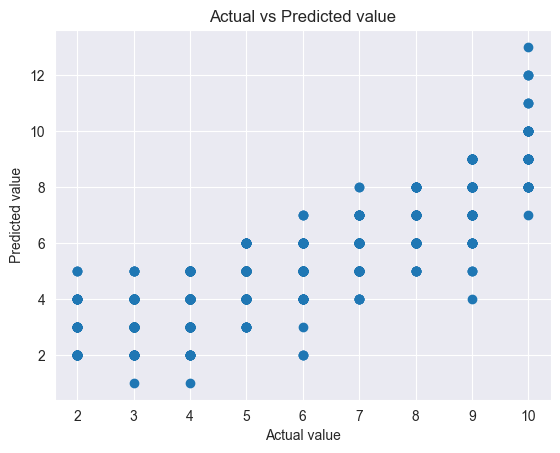

In [595]:
plot_predicted_vs_actual(y_test_mlr, y_pred_mlr)